## Earnings Before Bnterest/Taxes/Depreciation/Mmortization (EBITDA) Margin ANALYSIS

**EBITDA Margin** is a measure of a company’s operating profit as a percentage of its revenue.

The higher a company’s EBITDA margin is, the lower its operating expenses are in relation to total revenue.

So, a firm with revenue totaling £125,000 and EBITDA of £15,000 would have an EBITDA margin of:

> £15,000/£125,000 = 0.12 = 12%
  
Calculating a company’s EBITDA margin is helpful when gauging the effectiveness of a company’s cost-cutting efforts.

There are 6 sections to this project:

1. Importing Relevant Modules
2. Data Import
3. Data Cleaning
4. EBITDA Margin Analysis
5. Conclusion



## 1. Importing Modules
If any modules need installing, they can be installed by using "!pip install "Module Name"
> E.g. !pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
%matplotlib inline

## Importing Data Sources

This section imports the relevant data sources to complete this analysis.
We will be focusing on **EBITDA Margin** and **Returns**

In [2]:
# Import both the EBITDA Margin and Returns Sheets from the excel file, but for data cleaning we will focus on ROE for now. 

#Index_col will set the data column as an index
ebitda_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='EBITDAMargin', index_col=0)
returns_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='Returns', index_col=0)

# To test if the dataframe has been successfully created. Limited to 10 rows of data
ebitda_df.head(10)

,NasdaqGS:MSFT,NasdaqGS:AAPL,NasdaqGS:NVDA,NasdaqGS:AMZN,NasdaqGS:GOOGL,NasdaqGS:META,NYSE:BRK.B,NasdaqGS:AVGO,NasdaqGS:TSLA,NYSE:LLY,...,NYSE:IVZ,NYSE:DVA,NasdaqGS:AAL,NYSE:MHK,NYSE:BEN,NYSE:RL,NYSE:BIO,NasdaqGS:PARA,NasdaqGS:FOX,NasdaqGS:NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,52.8035,34.1753,61.7682,17.2171,35.1762,49.9212,27.0434,49.4403,12.7761,39.8272,...,18.0736,20.7245,9.6355,13.8203,21.8965,15.5977,20.0643,10.1780,20.3648,12.0971
2024-06-30,52.8035,34.1753,61.7682,17.2171,35.1762,49.9212,27.0434,49.4403,12.7761,39.8272,...,18.0736,20.7245,9.6355,13.8203,21.8965,15.5977,20.0643,10.1780,20.3648,12.0971
2024-05-31,53.2504,33.9678,61.7682,16.3538,34.4882,47.9616,29.0130,49.4403,12.9452,37.2193,...,17.2997,20.2030,11.1437,12.9454,23.9054,15.4552,19.3069,9.0283,19.8204,12.1148
2024-04-30,53.2504,33.9678,61.7682,16.3538,34.4882,47.9616,29.0130,51.9336,12.9452,37.2193,...,17.2997,20.2030,11.1437,12.9454,23.9054,15.4552,19.3069,9.0283,19.8204,12.1148
2024-03-31,53.2504,33.9678,56.5969,16.3538,34.4882,47.9616,29.0130,51.9336,12.9452,37.2193,...,17.2997,20.2030,11.1437,12.9454,23.9054,15.4552,19.3069,9.0283,19.8204,12.1148
2024-02-29,51.6185,33.7326,56.5969,14.8777,31.3080,44.6131,37.2259,51.9336,14.0101,36.0876,...,17.8171,19.3279,11.9326,12.9689,24.0124,12.2450,18.1079,7.6655,18.5546,12.1821
2024-01-31,51.6185,33.7326,56.5969,14.8777,31.3080,44.6131,37.2259,56.4030,14.0101,36.0876,...,17.8171,19.3279,11.9326,12.9689,24.0124,12.2450,18.1079,7.6655,18.5546,12.1821
2023-12-31,51.6185,33.7326,49.3893,14.8777,31.3080,44.6131,37.2259,56.4030,14.0101,36.0876,...,17.8171,19.3279,11.9326,12.9689,24.0124,12.2450,18.1079,7.6655,18.5546,12.1821
2023-11-30,49.7837,32.8267,49.3893,13.4754,29.9981,41.6734,31.4888,56.4030,15.7583,35.2834,...,20.5502,18.3778,13.5030,11.9810,24.7853,12.0075,18.7529,7.8122,19.2591,12.4363


In [3]:
# Ordering the dataset in ascending order based on the "Date" column
ebitda_df.index = pd.to_datetime(ebitda_df.index)
ebitda_df = ebitda_df.sort_index(ascending=True)

In [4]:
# Display information about dataframe such as number of data entries, number of columns, datatypes & shape of dataframe
print(ebitda_df.info())
print(ebitda_df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(490), int64(1), object(5)
memory usage: 446.5+ KB
None
(115, 496)


## 2. Data Cleaning
To tidy up column names, deal with nans and to remove any outliers.

### Changing Column Names
Removing all letters prior to the prefix ':'

In [5]:
# split on the last “:”, then take the right
ebitda_df.columns = ebitda_df.columns.str.rsplit(pat=':', n=1).str[-1]

In [6]:
ebitda_df.head(10)

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,35.9591,33.8653,20.9098,4.9051,32.5373,50.0320,20.0382,35.3478,1.4145,23.9997,...,27.3377,18.7630,15.4419,14.8778,38.4563,17.9689,14.0173,22.8372,0.0,8.9687
2015-02-28,35.9591,33.8653,20.9098,4.9051,32.5373,50.0320,20.0382,37.3243,1.4145,23.9997,...,27.3377,18.7630,15.4419,14.8778,38.4563,17.9689,14.0173,22.8372,0.0,8.9687
2015-03-31,35.5689,34.3790,20.9098,5.2966,32.2793,46.3019,20.2398,37.3243,0.5573,24.5331,...,28.1900,18.4496,17.7769,14.8778,38.4361,17.6738,15.0886,23.0270,0.0,8.8444
2015-04-30,35.5689,34.3790,21.2050,5.2966,32.2793,46.3019,20.2398,37.3243,0.5573,24.5331,...,28.1900,18.4496,17.7769,15.2466,38.4361,17.6738,15.0886,23.0270,0.0,8.8444
2015-05-31,35.5689,34.3790,21.2050,5.2966,32.2793,46.3019,20.2398,38.8506,0.5573,24.5331,...,28.1900,18.4496,17.7769,15.2466,38.4361,17.6738,15.0886,23.0270,0.0,8.8444
2015-06-30,35.8751,34.7151,21.2050,5.9765,32.4934,43.3060,18.4770,38.8506,-2.2993,25.2809,...,28.0986,18.1920,19.0618,15.2466,38.9118,16.5073,15.1066,22.2924,0.0,9.6902
2015-07-31,35.8751,34.7151,20.8368,5.9765,32.4934,43.3060,18.4770,38.8506,-2.2993,25.2809,...,28.0986,18.1920,19.0618,15.7923,38.9118,16.5073,15.1066,22.2924,0.0,9.6902
2015-08-31,35.8751,34.7151,20.8368,5.9765,32.4934,43.3060,18.4770,43.5199,-2.2993,25.2809,...,28.0986,18.1920,19.0618,15.7923,38.9118,16.5073,15.1066,22.2924,0.0,9.6902
2015-09-30,35.7389,35.2938,20.8368,6.9660,32.4735,41.4041,22.3484,43.5199,-4.8647,26.9361,...,28.7699,18.3423,20.9104,15.7923,38.8327,16.3469,15.4964,22.5012,0.0,9.5729


### Dealing with Not Meaningful Values

* Finding NM values
* Converting NM to nan using numpy
* Dropping columns with 100% nan data & columns with >=50% nan values

In [7]:
ebitda_df.isnull()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-02-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# returns an Index of all columns with at least one "NM"
cols_with_NM = ebitda_df.columns[ebitda_df.isin(['NM']).any()]

print(cols_with_NM.tolist())

['MRNA', 'IR', 'RCL', 'CCL', 'NCLH']


In [9]:
# NM needs converting to nan so python can better deal with these none meaningful numbers
ebitda_df.replace('NM', np.nan, inplace=True)

C:\TEMP\ipykernel_20244\1817352158.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ebitda_df.replace('NM', np.nan, inplace=True)


In [10]:
# There are a few outlier values in the dataset which will skew the overall analysis. To avoid this, we will mask the bottom 5% and top 5%
p5  = ebitda_df.quantile(0.05, axis=1)
p95 = ebitda_df.quantile(0.95, axis=1)

# 2) mask anything below p5 or above p95 → NaN
ebitda_df = ebitda_df.mask(ebitda_df.lt(p5, axis=0) | ebitda_df.gt(p95, axis=0))

In [11]:
# Drop all columns that contain just nan values
drop_all_na = ebitda_df.columns[ebitda_df.isna().all()]

# Drop columns that contain 50%+ nan values
na_ratio = ebitda_df.isna().mean()
drop_heavily_na = na_ratio[na_ratio > 0.5].index

# Drop columns that meet the above criteria
cols_to_drop = list(drop_all_na) + [c for c in drop_heavily_na if c not in drop_all_na]
ebitda_df.drop(columns=cols_to_drop, inplace=True)

# Fill nan with mean values
ebitda_df = ebitda_df.apply(lambda col: col.fillna(col.mean()), axis=0)

# To display if there are any nan values remaining. False = 0, True = Nans present
has_any_nans = ebitda_df.isna().values.any()
print(has_any_nans)

False


### Dealing with zeros

* An EBITDA Margin value of 0 means a company has breaken even. 
* Lower the EBITDA Margin, less stable are their finances.

In [12]:
# Count the amount of 0 values in the dataset, how many runs of consecutive zeros, max consecutive zero run

zero_metrics = (
    ebitda_df.eq(0)                                     # 1) True/False where ROE==0
          .pipe(lambda df: pd.DataFrame({           # 2) build a metrics DataFrame
              'Zero_Count': df.sum(),               #    – count of zeros
              'Max_Zero_Run':
                  df.apply(lambda s:              #    – for each column s:
                      # group on changes, sum each run, then take the max
                      s.groupby(s.ne(s.shift()).cumsum())
                       .sum()
                       .max()
                  ),
              'Total_Zero_Runs':
                  df.apply(lambda s:              #    – for each column s:
                      # same grouping, count how many runs >0
                      (s.groupby(s.ne(s.shift()).cumsum())
                        .sum() > 0)
                       .sum()
                  )
          }))
          .loc[lambda d: d['Zero_Count'] > 0]       # 3) keep only companies with ≥1 zero
          .rename_axis('Company')                   # 4) name the index
          .reset_index()                            # 5) make Company a column
)

print(zero_metrics)

Empty DataFrame
Columns: [Company, Zero_Count, Max_Zero_Run, Total_Zero_Runs]
Index: []


In [13]:
# Describes the data set by giving basic statistics such as mean, min, max, std and percentiles
ebitda_df.describe()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,43.333157,31.977791,32.473968,10.870997,31.903227,47.656906,24.465080,46.866150,13.423878,31.522982,...,26.061527,20.207246,15.239852,16.211345,31.600239,14.690235,17.566358,18.442957,23.175941,10.364089
std,5.822169,1.973243,7.927399,2.750329,1.983311,5.832121,11.277976,6.617022,4.034152,4.364315,...,3.261789,2.481303,3.619789,2.219637,5.018629,2.221908,3.889250,5.358491,2.218772,1.644247
min,32.767700,28.174700,20.836800,4.905100,27.726900,35.734400,6.591200,35.347800,4.306400,23.999700,...,17.299700,17.247100,5.312900,11.981000,21.896500,8.468700,12.070300,7.665500,18.554600,7.630700
25%,37.362100,30.675500,25.625900,8.568500,30.148500,44.597600,18.528400,42.107000,12.662700,27.089350,...,24.605400,18.342300,13.319350,14.475700,27.479150,14.613600,14.442350,14.121950,21.960650,8.965800
50%,44.235500,32.144700,32.781400,11.659700,32.306100,48.086300,21.905000,45.199800,13.423878,33.069900,...,27.437900,20.125200,15.239852,16.054300,30.216300,15.379400,15.740200,21.256700,23.175941,9.706000
75%,48.147250,33.732600,37.042600,12.915300,32.966700,51.743000,29.063600,52.485800,14.210600,34.845550,...,28.204800,21.095500,17.673600,18.242950,36.150950,15.653700,19.780500,22.360750,24.061100,11.989150
max,53.250400,35.293800,56.596900,17.217100,35.615900,57.478600,56.508100,57.854800,21.385700,39.827200,...,29.320900,29.276100,21.737500,19.629400,39.054400,17.968900,26.084800,23.370800,27.829800,13.654300


In [14]:
# Renaming clean dataframe
ebitda_df_final = ebitda_df

### Exporting Clean Data to CSV
* For the purpose of the machine learning aspect of the project

In [15]:
ebitda_df_final.to_csv('ebitdamargin_df_clean_data.csv', index=True, index_label='Date')

### Cleaning Returns data sheet

In [16]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2024-07-20 to 2013-09-30
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(496)
memory usage: 508.6 KB


### Changing Column Names
Removing all letters prior to the prefix ':'

In [21]:
# split on the last “:”, then take the right-hand piece
returns_df.columns = returns_df.columns.str.rsplit(pat=':', n=1).str[-1]

In [22]:
# Ordering the dataset in ascending order based on the "Date" column
returns_df.index = pd.to_datetime(returns_df.index)
returns_df = returns_df.sort_index(ascending=True)

In [23]:
# Appending dropped column lists from EBITDA Margin dataset
roe_dropped_columns = drop_all_na.append(drop_heavily_na)
print(roe_dropped_columns.tolist())

# Dropping columns that were dropped from the ROE dataset
to_drop_in_returns_df = [c for c in roe_dropped_columns if c in returns_df.columns]
returns_df = returns_df.drop(columns=to_drop_in_returns_df)

['JPM', 'V', 'BAC', 'WFC', 'GS', 'AXP', 'MS', 'C', 'BAC.1', 'BX', 'SCHW', 'CRWD', 'KKR', 'CME', 'PNC', 'USB', 'COF', 'TFC', 'O', 'SPG', 'PSA', 'BK', 'GEV', 'DFS', 'MTB', 'FITB', 'STT', 'SBAC', 'RJF', 'SYF', 'RF', 'HBAN', 'CFG', 'ESS', 'NTRS', 'EG', 'VRSN', 'KEY', 'REG', 'FRT', 'JPM', 'V', 'BAC', 'WFC', 'GS', 'AXP', 'UBER', 'MS', 'C', 'PLD', 'PANW', 'BAC.1', 'AMT', 'BX', 'SCHW', 'ICE', 'CRWD', 'KKR', 'MCK', 'CME', 'PNC', 'USB', 'ABNB', 'PSX', 'COF', 'TFC', 'O', 'SPG', 'PSA', 'BK', 'GEV', 'MRNA', 'FANG', 'COR', 'DFS', 'EXR', 'KVUE', 'VICI', 'AVB', 'MTB', 'FITB', 'STT', 'EQR', 'CAH', 'SBAC', 'VLTO', 'RJF', 'SYF', 'RF', 'HBAN', 'ARE', 'CFG', 'ESS', 'NTRS', 'EG', 'MOH', 'BG', 'VRSN', 'EQT', 'KEY', 'KIM', 'UDR', 'REG', 'FRT']


In [24]:
# To check column numbers match in both datasheets
print(returns_df.info())
print(ebitda_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2013-09-30 to 2024-07-20
Columns: 432 entries, MSFT to NWS
dtypes: float64(432)
memory usage: 443.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 432 entries, MSFT to NWS
dtypes: float64(432)
memory usage: 389.0 KB
None


In [25]:
returns_df.isnull()

,MSFT,AAPL,NVDA,AMZN,GOOGL,META,BRK.B,AVGO,TSLA,LLY,...,IVZ,DVA,AAL,MHK,BEN,RL,BIO,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2013-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2013-10-31,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2013-11-30,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2013-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2014-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
returnsna_counts = returns_df.isna().sum()               # Series of NA counts per column
print(returnsna_counts[returnsna_counts > 0]) 

ANET     10
PYPL     23
CEG     101
CARR     79
HLT       4
OTIS     79
IR       45
CTVA     70
DOW      68
KDP      59
HWM      39
FTV      35
KHC      23
HPE      26
VST      38
KEYS     14
INVH     42
GDDY     20
AMCR     70
LW       39
ALLE      3
MTCH     83
FOXA     67
DAY      56
CZR      13
ETSY     20
PAYC      8
AAL       4
FOX      67
dtype: int64


In [27]:
# returns an Index of all columns with at least one "NM"
returns_cols_with_NM = returns_df.columns[returns_df.isin(['NM']).any()]

print(returns_cols_with_NM.tolist())

[]


In [32]:
# Appending dropped column lists from EBITDA dataset
ebitda_dropped_columns = drop_all_na.append(drop_heavily_na)
print(ebitda_dropped_columns.tolist())

# Dropping columns that were dropped from the EBITDA dataset
to_drop_in_returns_df = [c for c in ebitda_dropped_columns if c in returns_df.columns]
returns_df = returns_df.drop(columns=to_drop_in_returns_df)

['JPM', 'V', 'BAC', 'WFC', 'GS', 'AXP', 'MS', 'C', 'BAC.1', 'BX', 'SCHW', 'CRWD', 'KKR', 'CME', 'PNC', 'USB', 'COF', 'TFC', 'O', 'SPG', 'PSA', 'BK', 'GEV', 'DFS', 'MTB', 'FITB', 'STT', 'SBAC', 'RJF', 'SYF', 'RF', 'HBAN', 'CFG', 'ESS', 'NTRS', 'EG', 'VRSN', 'KEY', 'REG', 'FRT', 'JPM', 'V', 'BAC', 'WFC', 'GS', 'AXP', 'UBER', 'MS', 'C', 'PLD', 'PANW', 'BAC.1', 'AMT', 'BX', 'SCHW', 'ICE', 'CRWD', 'KKR', 'MCK', 'CME', 'PNC', 'USB', 'ABNB', 'PSX', 'COF', 'TFC', 'O', 'SPG', 'PSA', 'BK', 'GEV', 'MRNA', 'FANG', 'COR', 'DFS', 'EXR', 'KVUE', 'VICI', 'AVB', 'MTB', 'FITB', 'STT', 'EQR', 'CAH', 'SBAC', 'VLTO', 'RJF', 'SYF', 'RF', 'HBAN', 'ARE', 'CFG', 'ESS', 'NTRS', 'EG', 'MOH', 'BG', 'VRSN', 'EQT', 'KEY', 'KIM', 'UDR', 'REG', 'FRT']


In [33]:
# To check column numbers match in both datasheets
print(returns_df.info())
print(ebitda_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2013-09-30 to 2024-07-20
Columns: 432 entries, MSFT to NWS
dtypes: float64(432)
memory usage: 443.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 432 entries, MSFT to NWS
dtypes: float64(432)
memory usage: 389.0 KB
None


In [35]:
# Drop all columns that contain just nan values
drop_all_na_returns = returns_df.columns[returns_df.isna().all()]

# Drop columns that contain 50%+ nan values
na_ratio_returns = returns_df.isna().mean()
drop_heavily_na_returns = na_ratio_returns[na_ratio_returns > 0.5].index

# Drop columns that meet the above criteria
cols_to_drop_returns = list(drop_all_na_returns) + [c for c in drop_heavily_na_returns if c not in drop_all_na_returns]
returns_df.drop(columns=cols_to_drop_returns, inplace=True)

# Fill nan with mean values
returns_df = returns_df.apply(lambda col: col.fillna(col.mean()), axis=0)

# To display if there are any nan values remaining. False = 0, True = Nans present
has_any_nans_returns = returns_df.isna().values.any()
print(has_any_nans_returns)

# To double check no nas
returnsna_counts = returns_df.isna().sum()               # Series of NA counts per column
print(returnsna_counts[returnsna_counts > 0]) 

False


DATA SET IS CLEAN

# 4. ROE Analysis

### Distribution

Text(0, 0.5, 'Frequency')

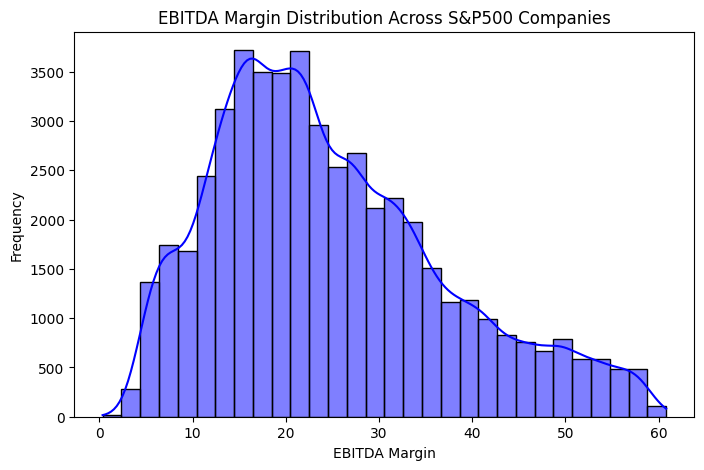

In [37]:
# change wide dataset to a long dataset
ebitda_long = ebitda_df_final.melt(var_name='Company', value_name='EBITDA')

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data=ebitda_long, x='EBITDA', bins=30, kde=True, color='blue')
plt.title('EBITDA Margin Distribution Across S&P500 Companies')
plt.xlabel('EBITDA Margin')
plt.ylabel('Frequency')


From the chart you can see:

* Most observations cluster between ~10 % and ~25 %.

* There’s a clear right skew—a long tail of firm‐dates with very high margins (30 %–60 %).

* Very few margins are below about 5 %.

In plain terms, the “typical” S&P 500 company in your dataset has an EBITDA margin around 15 %–20 %, but a handful of firms and/or periods exhibit unusually high profitability, creating that extended right tail.

### Mean EBITDA Margin & Mean Returns

In [44]:
summary = pd.DataFrame({
    "Mean EBITDA": ebitda_df_final.mean(),
    "Mean Return": returns_df.mean(),
    "Max EBITDA": ebitda_df_final.max(),
    "Max Return": returns_df.max()
})
display(summary.sort_values("Mean EBITDA", ascending=False).head(10))

,Mean EBITDA,Mean Return,Max EBITDA,Max Return
BXP,58.359922,-0.000278,60.2432,0.355614
MA,58.237418,0.017437,60.3354,0.165847
MAA,56.732228,0.008089,58.6912,0.146538
CPT,56.630170,0.006288,58.6248,0.126027
CCI,55.332655,0.005031,60.3299,0.261347
MKTX,54.435555,0.015777,57.5429,0.368163
APA,53.426226,0.016030,59.9380,2.129187
MO,53.257733,0.004938,60.8184,0.173394
MSCI,52.726500,0.022527,58.5114,0.170306
CPAY,52.337795,0.011584,55.6808,0.293288


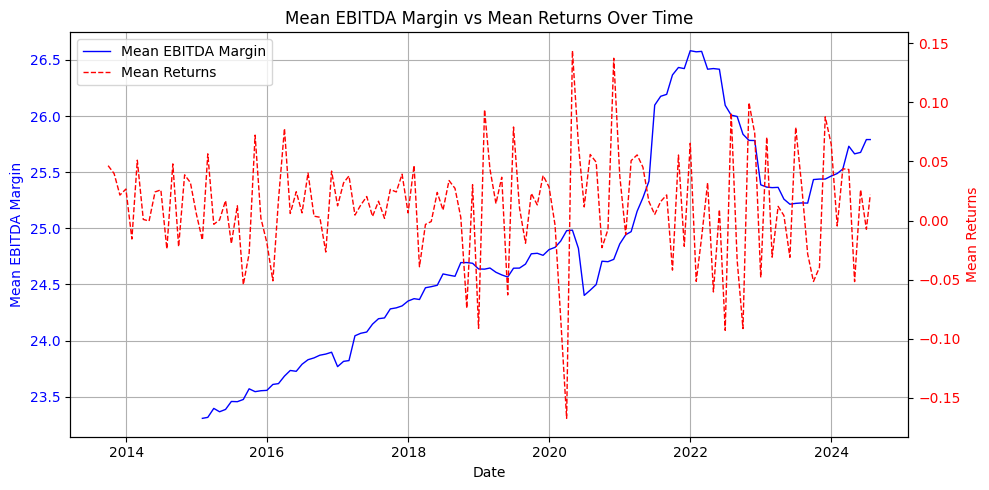

In [45]:
# Mean Variables
mean_ebitda = ebitda_df_final.mean(axis=1)
mean_returns = returns_df.mean(axis=1)

# Plot on dual axes
fig, ax1 = plt.subplots(figsize=(10,5))

# Left axis: Mean EBITDA Margin
ax1.plot(ebitda_df_final.index, mean_ebitda,
         'b-', linewidth=1, label='Mean EBITDA Margin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean EBITDA Margin', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right axis: Mean returns
ax2 = ax1.twinx()
ax2.plot(mean_returns.index, mean_returns,
         'r--', linewidth=1, label='Mean Returns')
ax2.set_ylabel('Mean Returns', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Mean EBITDA Margin vs Mean Returns Over Time')
ax1.grid(True)
fig.tight_layout()
plt.show()

### Median EBITDA Margin & Median Returns

In [46]:
# Date is already the index and all columns are numeric
median_ebitda = ebitda_df_final.median(axis=1)
median_returns = returns_df.median(axis=1)

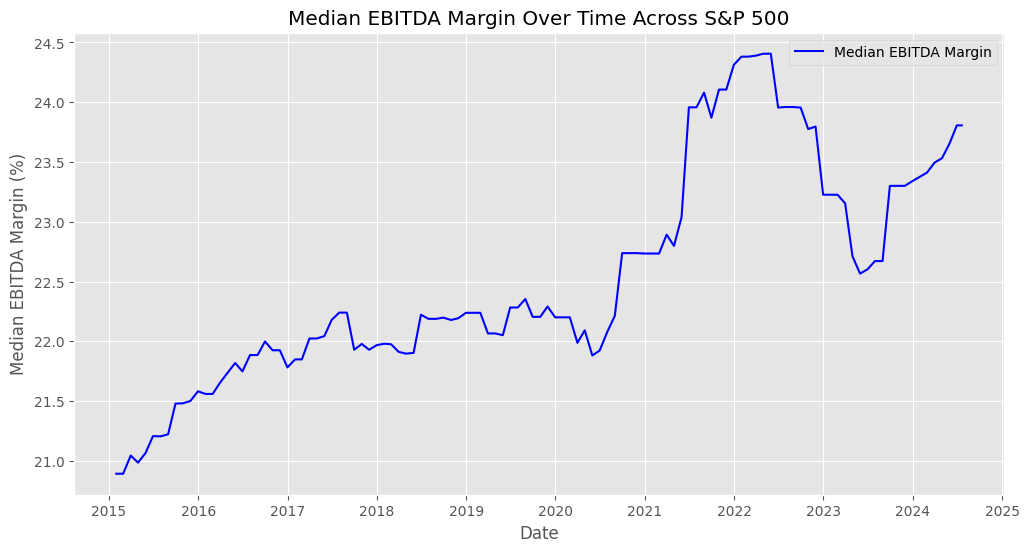

In [47]:
x = median_ebitda.index
y = median_ebitda.values


plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
plt.plot(x, y, label='Median EBITDA Margin', color='b')
plt.title('Median EBITDA Margin Over Time Across S&P 500')
plt.xlabel('Date')
plt.ylabel('Median EBITDA Margin (%)')
plt.legend()

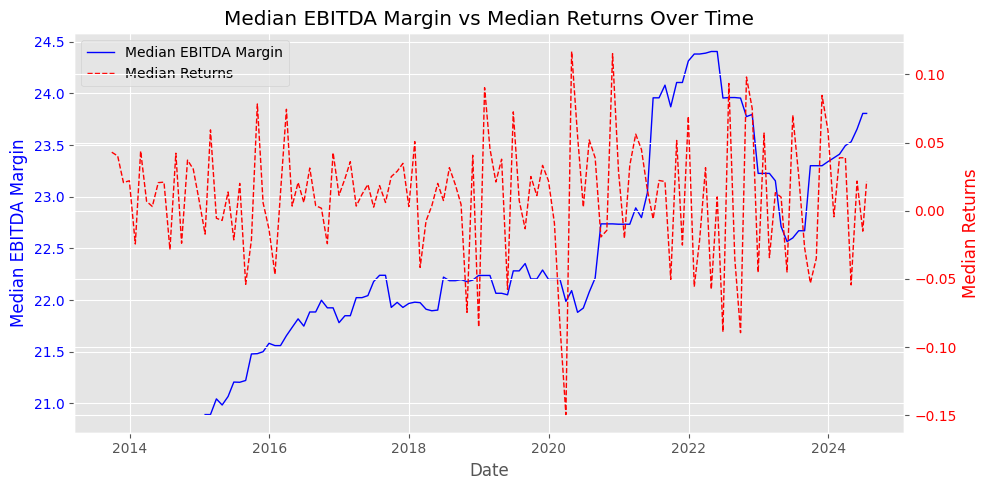

In [48]:
# 4) Plot on dual axes
fig, ax1 = plt.subplots(figsize=(10,5))

# Left axis: Median EBITDA Margin
ax1.plot(ebitda_df.index, median_ebitda,
         'b-', linewidth=1, label='Median EBITDA Margin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Median EBITDA Margin', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right axis: Median returns
ax2 = ax1.twinx()
ax2.plot(median_returns.index, median_returns,
         'r--', linewidth=1, label='Median Returns')
ax2.set_ylabel('Median Returns', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Median EBITDA Margin vs Median Returns Over Time')
ax1.grid(True)
fig.tight_layout()
plt.show()

In [49]:
# Apply a 12 month rolling window to smooth the series 
ebitda_smoothed = median_ebitda.rolling(window=3, center=True).mean()
returns_smoothed = median_returns.rolling(window=12, center=True).mean()

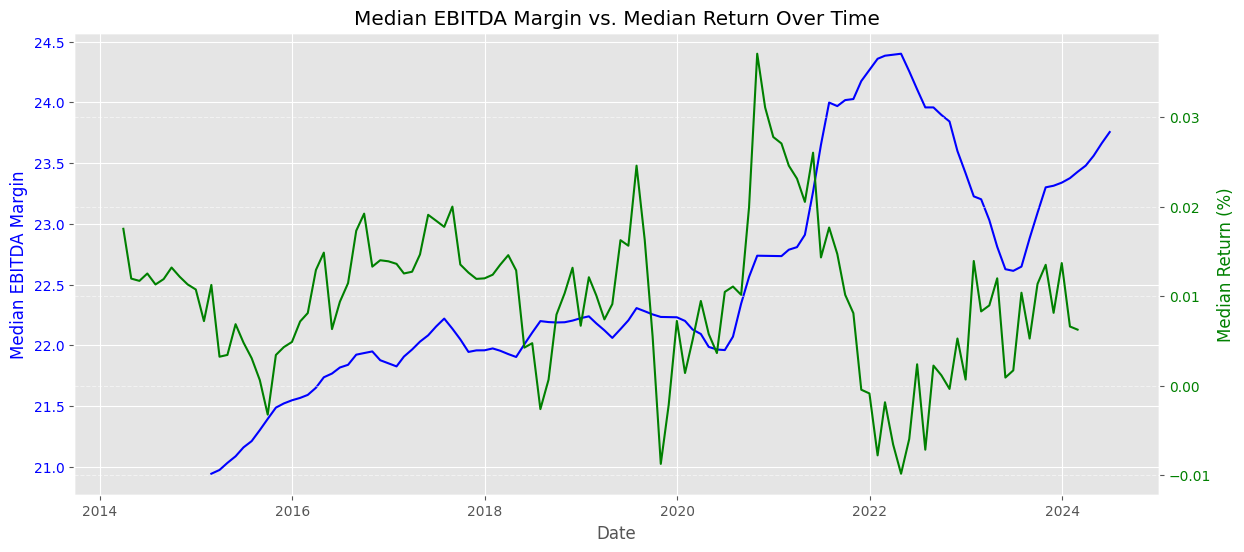

In [50]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# EBITDA Margin on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Median EBITDA Margin', color='blue')
ax1.plot(ebitda_smoothed,color='blue', label='Median EBITDA Margin')
ax1.tick_params(axis='y', labelcolor='blue')

# Returns on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Median Return (%)', color='green')
ax2.plot(returns_smoothed, color='green', label='Median Return (%)')
ax2.tick_params(axis='y', labelcolor='green')


plt.title('Median EBITDA Margin vs. Median Return Over Time')
plt.grid(True, which='major', axis='both', linestyle='--', alpha=0.5)

## CORRELATION

### Universal Correlation

In [51]:
def merged_long(feature_df, returns_df, feature):
    feature_long = feature_df.reset_index().melt(id_vars='Date', var_name='Company', value_name= feature)
    returns_long = returns_df.reset_index().melt(id_vars='Date', var_name='Company', value_name='Return')
    for df in [feature_long, returns_long]:
        df['Date'] = pd.to_datetime(df['Date']) # Ensure datetime and sort
        df.sort_values(['Company', 'Date'], inplace=True)
# Merge dataframe on Date and Company
    merged_df = feature_long.merge(returns_long, on=['Date', 'Company'])
    merged_df = merged_df.dropna() #drop missing values
    return merged_df
merged_df = merged_long(ebitda_df_final, returns_df, 'EBITDA')

#Then to calculate corr coef:
def correlation_raw(feature):
    corr_raw = merged_df[[feature, 'Return']].corr()
    print(corr_raw)
correlation_raw('EBITDA')

          EBITDA    Return
EBITDA  1.000000 -0.014841
Return -0.014841  1.000000


<div class="alert alert-block alert-info">
Correlation Coefficient between ROE and returns for all companies & dates: <b>0.01</b>
</div>

### Median Time-Series Correlation

In [52]:
#Correlation between the median values
combined_medians = pd.concat([ebitda_smoothed, returns_smoothed], axis=1)
combined_medians.columns = ['EBITDA', 'Returns']
corr_coeff_ebitda = combined_medians['EBITDA'].corr(combined_medians['Returns'])
print(corr_coeff_ebitda)

-0.1944452370383547


<div class="alert alert-block alert-info">
Correlation Coefficient between rolling 3 month median EBITDA Margin and rolling 12-month median returns: <b>-0.19</b>
</div>

### Positive & Negative Correlations: Per Company

In [55]:
merged = ebitda_df_final.columns.intersection(returns_df.columns)

correlations = {}  

for company in merged:
    ebitda_series = ebitda_df_final[company]
    returns_series = returns_df[company]

    # Combine & drop rows with NaNs in either
    combined = pd.concat([ebitda_series, returns_series], axis=1).dropna()

    if not combined.empty:
        correlations[company] = np.corrcoef(combined.iloc[:, 0], combined.iloc[:, 1])[0, 1] 

# Convert to DataFrame 
corr_ebitda_df = pd.Series(correlations, name='EBITDA_Return_Correlation').to_frame()
corr_ebitda_df = corr_ebitda_df.sort_values(by='EBITDA_Return_Correlation')

Text(0, 0.5, 'S&P500 Company')

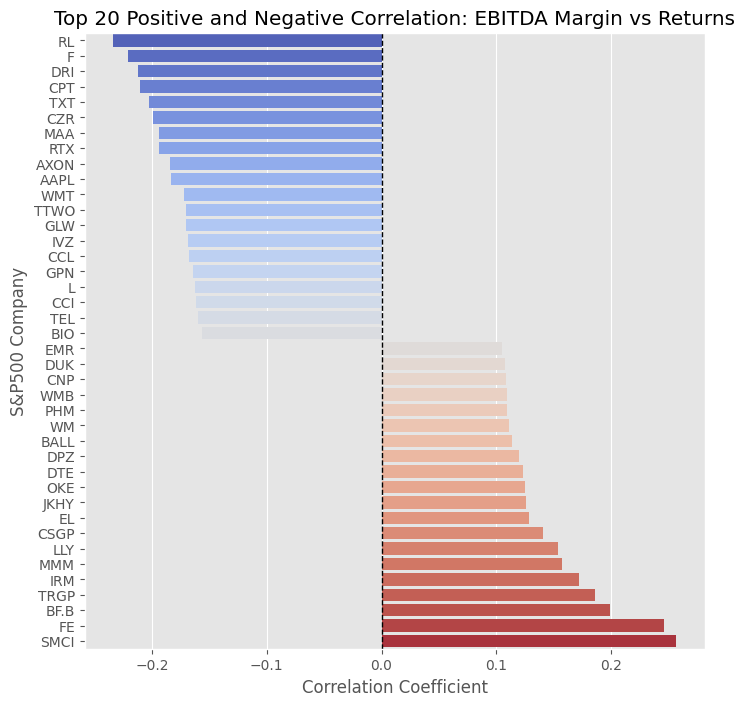

In [56]:
top_negative = corr_ebitda_df.head(20)
top_positive = corr_ebitda_df.tail(20)

combined_corr = pd.concat([top_negative, top_positive])
combined_corr = combined_corr.reset_index()
combined_corr.columns = ['Company', 'Correlation']
combined_corr = combined_corr.sort_values('Correlation')

plt.figure(figsize=(8,8))
sns.barplot(data=combined_corr, y = 'Company', x='Correlation', palette='coolwarm', hue = 'Company', legend=False)

#vertical line for 0
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.title('Top 20 Positive and Negative Correlation: EBITDA Margin vs Returns')
plt.xlabel('Correlation Coefficient')
plt.ylabel('S&P500 Company')


### Linear Relationships & Regression
Looking into the individual EBITDA Margin vs Returns relationship to a sample of companies in the S & P 500 company list 
> E.g. Walmart, Microsoft, Google, Amazon, Meta, Visa, Netflix, Coca-Cola, JPMorgan

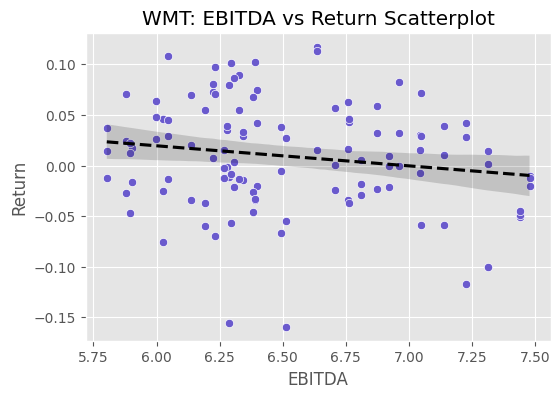

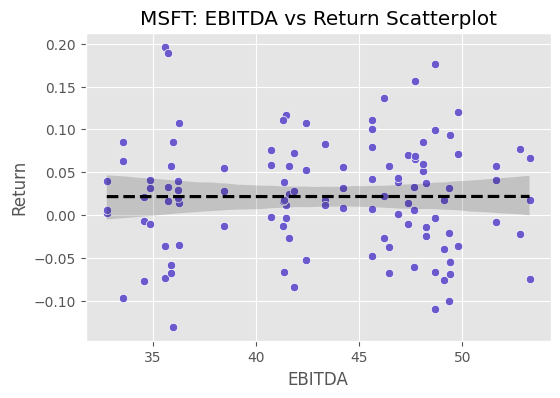

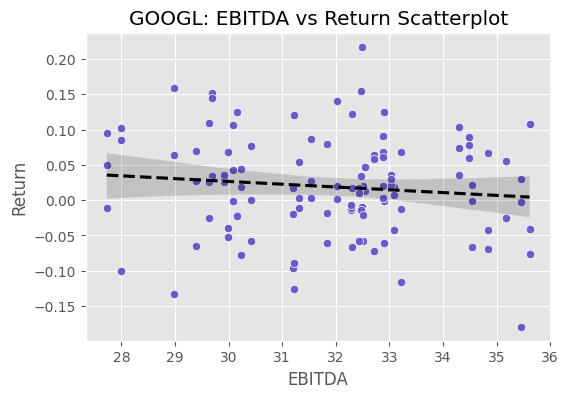

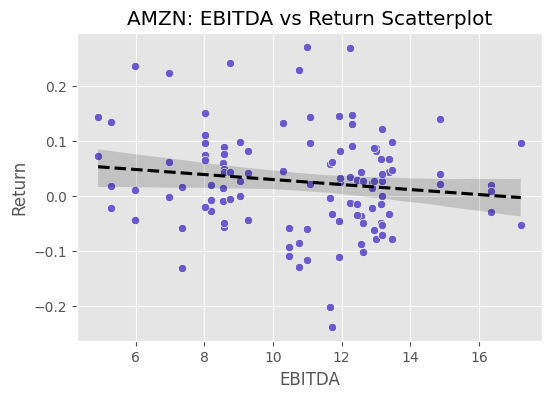

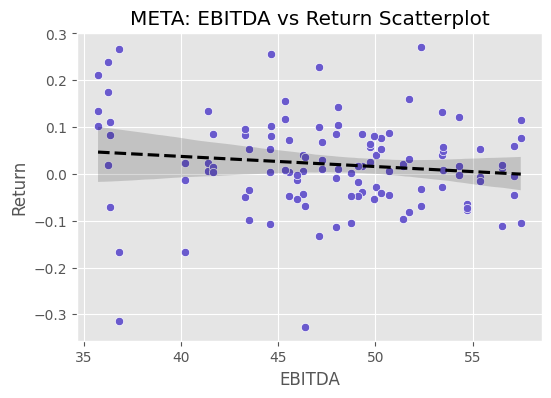

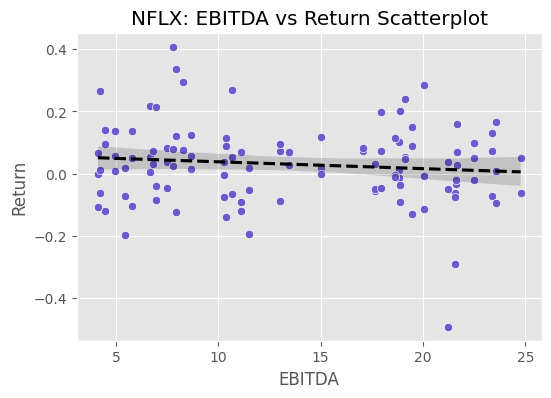

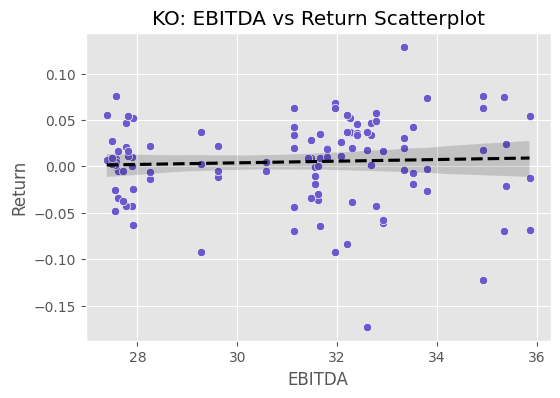

In [57]:
def sample_scatter(feature_df, return_df, feature_name):
    sample_companies = ['WMT', 'MSFT', 'GOOGL', 'AMZN', 'META', 'V', 'NFLX', 'KO', 'JPM']
    for company in sample_companies:
        if company in feature_df.columns and company in returns_df.columns:
            df_scatter = pd.DataFrame({
                feature_name: feature_df[company],
                'Return': return_df[company]
            }).dropna()

            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=df_scatter, x=feature_name, y='Return', color='slateblue')
            sns.regplot(data=df_scatter, x=feature_name, y='Return', scatter=False, color='black', line_kws={'linestyle': '--'})
            plt.title(f"{company}: {feature_name} vs Return Scatterplot")

sample_scatter(ebitda_df_final, returns_df, 'EBITDA')

> Because those lines are nearly flat and the points are widely scattered, the plots visually confirm that for each individual name, EBITDA margin has at best a very weak—and often slightly negative—linear relationship with subsequent returns.

### Pooled EBITDA Margin vs Returns

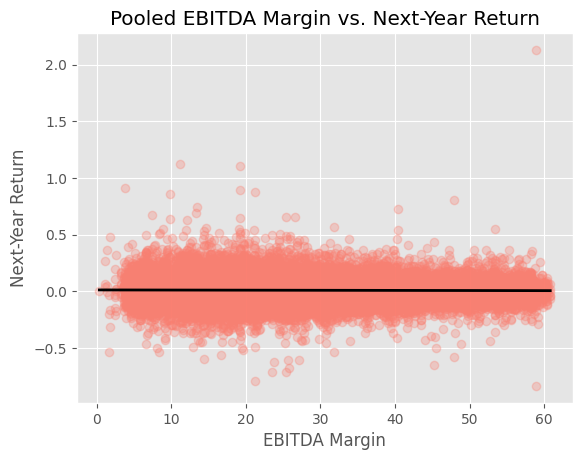

In [58]:
# prepare long form
df_long = pd.concat([
    ebitda_df_final.stack().rename("EBITDA"),
    returns_df.stack().rename("Ret")
], axis=1).dropna().reset_index()

sns.regplot(data=df_long, x="EBITDA", y="Ret", scatter_kws={"alpha":0.3, "color": "salmon"},
           line_kws = {"color": "black", "linewidth": 2} )
plt.title("Pooled EBITDA Margin vs. Next-Year Return")
plt.xlabel("EBITDA Margin")
plt.ylabel("Next-Year Return")
plt.show()

* **No reliable slope:** the regression line has near‐zero slope, indicating virtually no linear relationship between EBITDA margin and next‐year return once you pool across the entire universe.

* **Massive noise:** returns scatter so broadly at every margin level that margin alone provides almost no predictive power.

> In short, EBITDA margin by itself is a very weak standalone predictor of future stock performance.

### Ranking by Statistical Significance

In [59]:
# find the tickers present in both
common = ebitda_df_final.columns.intersection(returns_df.columns)

# prepare an empty DataFrame to collect results
results = pd.DataFrame(index=common, columns=["slope","intercept","r","p","stderr"])

for t in common:
    # align & drop NaNs
    ebitda = ebitda_df_final[t]
    ret = returns_df[t].loc[ebitda.index]
    mask = ebitda.notna() & ret.notna()
    ebitda, ret = ebitda[mask], ret[mask]
    
    # skip if too few points
    if len(ebitda) < 5:
        continue
    
    slope, intercept, r, p, stderr = linregress(ebitda, ret)
    results.loc[t] = [slope, intercept, r, p, stderr]

# convert types and sort by strongest correlation
results = results.astype(float).sort_values("r", ascending=False) #Sorting top 15 positive correlations
display(results.head(15))

,slope,intercept,r,p,stderr
SMCI,0.024418,-0.125667,0.257179,0.005526,0.008631
FE,0.002998,-0.088965,0.246011,0.008044,0.001111
BF.B,0.005666,-0.188113,0.198948,0.033046,0.002625
TRGP,0.006841,-0.093693,0.186337,0.046162,0.003393
IRM,0.009060,-0.287475,0.172460,0.065321,0.004868
MMM,0.003804,-0.103875,0.157803,0.092118,0.002239
LLY,0.002510,-0.054534,0.153720,0.100959,0.001518
CSGP,0.001771,-0.028337,0.140595,0.133953,0.001173
EL,0.003716,-0.067868,0.128424,0.171369,0.002700
JKHY,0.002726,-0.068974,0.126002,0.179655,0.002019


### Significance vs Significance using Bonferroni Correction

In [60]:
# 1) Without multiple‐test correction (α = 0.05)
sig05 = results[results["p"] <= 0.05]
print("Significant at p ≤ 0.05:")
print(sig05[["r","p"]])

# 2) With Bonferroni correction for 10 tests (α = 0.05/10 = 0.005)
sigBonf = results[results["p"] <= 0.005]
print("\nSignificant at p ≤ 0.005 (Bonferroni):")
print(sigBonf[["r","p"]])

Significant at p ≤ 0.05:
             r         p
SMCI  0.257179  0.005526
FE    0.246011  0.008044
BF.B  0.198948  0.033046
TRGP  0.186337  0.046162
AAPL -0.183391  0.049781
AXON -0.184657  0.048198
RTX  -0.194086  0.037672
MAA  -0.194187  0.037570
CZR  -0.198925  0.033066
TXT  -0.203152  0.029442
CPT  -0.210432  0.023988
DRI  -0.212663  0.022501
F    -0.220851  0.017699
RL   -0.234279  0.011732

Significant at p ≤ 0.005 (Bonferroni):
Empty DataFrame
Columns: [r, p]
Index: []


 > If you don’t correct for multiple comparisons, a dozen stocks look like they have “significant” EBITDA Margin–return links at the 5% level.

> But once you account for the fact you ran 10 tests (Bonferroni), none remain reliably different from zero. SMCI is the closest with 0.0055.

## 5. Conclusion

> EBIDTA Margin vs Returns had a pooled correlation coeeficient of 0.01

Across every lens we’ve applied, EBITDA margin by itself is a very weak predictor of S&P 500 stock performance:

* **No reliable ticker-by-ticker signals:** Individual company scatterplots (e.g. WMT, MSFT, GOOGL, AMZN, META) all show nearly flat regression lines and massive return dispersion. Formal regressions yield only a handful of p ≤ 0.05 cases—and none survive a Bonferroni correction for multiple tests.

* **Minuscule effect sizes:** Even the “best” slopes correspond to |r| < 0.2 (r² < 4%), meaning a 10 pp higher margin would predict < 0.4 pp of extra return—practically lost in market noise and transaction costs.

* **Near-zero pooled correlation:** Stacking all (company, date) observations delivers Pearson r ≈ 0.01, so margin explains only 0.01² = 0.0001 (0.01%) of return variance across the universe.

* **Aggregate statistics are misleading:** Time-series of median margins vs. median returns can show moderate co-movement (especially when smoothed), but that reflects broad market cycles—not a tradable edge on individual stocks.

**Bottom line:**

> EBITDA margin alone is too noisy and too blunt a metric to serve as a standalone stock-picking or timing signal. Any meaningful predictive power will come only when it’s embedded within a richer multi-factor model, controlled for industry/size effects, and validated via portfolio-level backtests and out-of-sample tests.
